In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os

%matplotlib inline

C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\ten

In [2]:
# Define the locations of train and test data
dataset_train = './development/dataset_train/'
dataset_test = './development/dataset_test/'

In [3]:
# Convert the training dataset
Idx.save_idx(dataset_train)

# Convert the test dataset
Idx.save_idx(dataset_test)

In [3]:
# Read the data 
filename = '{}images.idx3-ubyte'.format(dataset_train)
train_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_train)
train_labels = Idx.load_labels(filename)

# Read the data 
filename = '{}images.idx3-ubyte'.format(dataset_test)
test_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_test)
test_labels = Idx.load_labels(filename)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


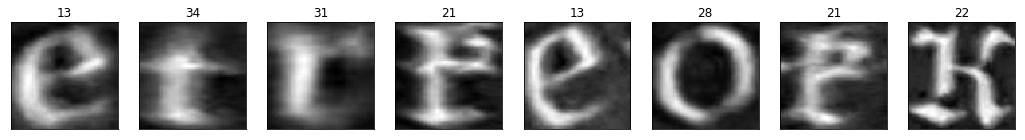

In [4]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(train_labels[image_num])

Modified from: https://www.tensorflow.org/tutorials/keras/basic_classification

In [5]:
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']

train_images = train_images / 255.0
test_images = test_images / 255.0

n_categories = len(class_names)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(n_categories, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0817 00:24:01.067139 17808 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
history = model.fit(train_images, train_labels, epochs=20)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
12072/12072 [==============================] - 3s 263us/sample - loss: 0.8067 - acc: 0.8249
Epoch 2/20
12072/12072 [==============================] - 3s 239us/sample - loss: 0.2430 - acc: 0.9389
Epoch 3/20
12072/12072 [==============================] - 3s 234us/sample - loss: 0.1988 - acc: 0.9489
Epoch 4/20
12072/12072 [==============================] - 3s 233us/sample - loss: 0.1548 - acc: 0.9610
Epoch 5/20
12072/12072 [==============================] - 3s 236us/sample - loss: 0.1436 - acc: 0.9622
Epoch 6/20
12072/12072 [==============================] - 3s 237us/sample - loss: 0.1399 - acc: 0.9633
Epoch 7/20
12072/12072 [==============================] - 3s 235us/sample - loss: 0.1106 - acc: 0.9732
Epoch 8/20
12072/12072 [==============================] - 3s 232us/sample - loss: 0.1234 - acc: 0.9680
Epoch 9/20
12072/12072 [==============================] - 3s 234us/sample - loss: 0.0997 - acc: 0.9736
Epoch 10/20
12072/12072 [==============================] - 3s 233us/sampl

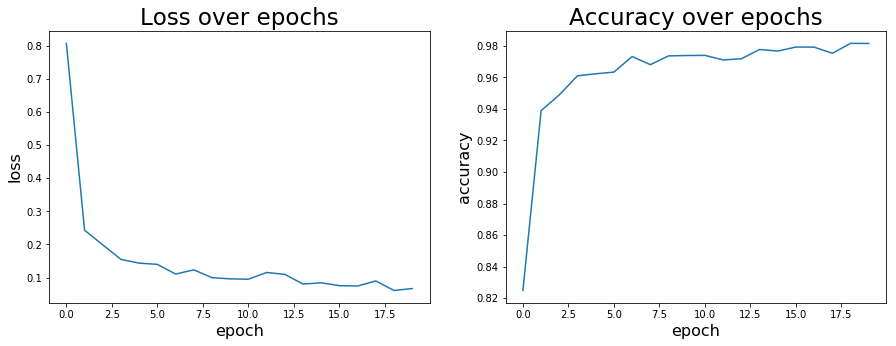

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

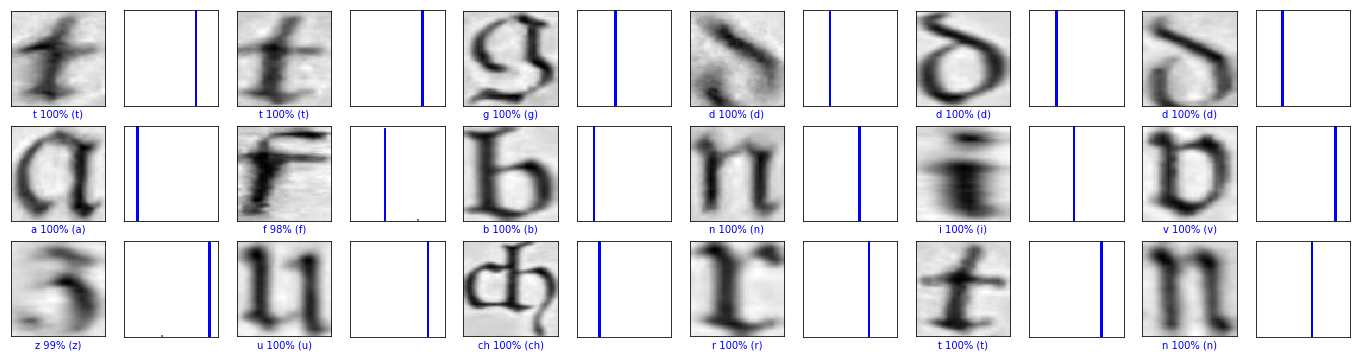

In [9]:
predictions = model.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [10]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model.h5")
print("Model saved")

Model saved


In [3]:
# Read the data 
filename = '{}images.idx3-ubyte'.format(dataset_train)
train_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_train)
train_labels = Idx.load_labels(filename)

# Read the data 
filename = '{}images.idx3-ubyte'.format(dataset_test)
test_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_test)
test_labels = Idx.load_labels(filename)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


In [4]:
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']

train_images = train_images / 255.0
test_images = test_images / 255.0

n_categories = len(class_names)

In [5]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


batch_size = 128
epochs = 300

img_rows = 80
img_cols = 80

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_categories, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history =  model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))
score = model.evaluate(test_images, test_labels, verbose=0)

W0817 00:31:01.599066  1816 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 12072 samples, validate on 4947 samples
Epoch 1/300
12072/12072 [==============================] - 88s 7ms/sample - loss: 3.7309 - acc: 0.0713 - val_loss: 3.6363 - val_acc: 0.2120
Epoch 2/300
12072/12072 [==============================] - 82s 7ms/sample - loss: 3.5937 - acc: 0.1537 - val_loss: 3.4798 - val_acc: 0.2571
Epoch 3/300
12072/12072 [==============================] - 82s 7ms/sample - loss: 3.4560 - acc: 0.1829 - val_loss: 3.3015 - val_acc: 0.2717
Epoch 4/300
12072/12072 [==============================] - 82s 7ms/sample - loss: 3.3210 - acc: 0.2252 - val_loss: 3.1086 - val_acc: 0.3503
Epoch 5/300
12072/12072 [==============================] - 83s 7ms/sample - loss: 3.1672 - acc: 0.2721 - val_loss: 2.8902 - val_acc: 0.4482
Epoch 6/300
12072/12072 [==============================] - 83s 7ms/sample - loss: 2.9941 - acc: 0.3230 - val_loss: 2.6491 - val_acc: 0.4985
Epoch 7/300
12072/12072 [==============================] - 83s 7ms/sample - loss: 2.8074 - acc: 0.3722 - val_lo

Epoch 59/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.5185 - acc: 0.8733 - val_loss: 0.1954 - val_acc: 0.9634
Epoch 60/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.5090 - acc: 0.8752 - val_loss: 0.1909 - val_acc: 0.9642
Epoch 61/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.4995 - acc: 0.8806 - val_loss: 0.1896 - val_acc: 0.9644
Epoch 62/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.5087 - acc: 0.8741 - val_loss: 0.1875 - val_acc: 0.9642
Epoch 63/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.4948 - acc: 0.8785 - val_loss: 0.1837 - val_acc: 0.9662
Epoch 64/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.4825 - acc: 0.8792 - val_loss: 0.1811 - val_acc: 0.9666
Epoch 65/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.4854 - acc: 0.8779 - val_loss: 0.1761 - val_acc: 0.9677
Epoch 66/300


Epoch 117/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3333 - acc: 0.9161 - val_loss: 0.0999 - val_acc: 0.9798
Epoch 118/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3304 - acc: 0.9169 - val_loss: 0.0981 - val_acc: 0.9804
Epoch 119/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3270 - acc: 0.9173 - val_loss: 0.0974 - val_acc: 0.9800
Epoch 120/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3304 - acc: 0.9142 - val_loss: 0.0967 - val_acc: 0.9806
Epoch 121/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3293 - acc: 0.9163 - val_loss: 0.0976 - val_acc: 0.9804
Epoch 122/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3199 - acc: 0.9175 - val_loss: 0.0961 - val_acc: 0.9804
Epoch 123/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.3158 - acc: 0.9171 - val_loss: 0.0954 - val_acc: 0.9802
Epoch 

12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2695 - acc: 0.9297 - val_loss: 0.0753 - val_acc: 0.9838
Epoch 175/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2715 - acc: 0.9281 - val_loss: 0.0764 - val_acc: 0.9842
Epoch 176/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2693 - acc: 0.9295 - val_loss: 0.0759 - val_acc: 0.9842
Epoch 177/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2691 - acc: 0.9316 - val_loss: 0.0757 - val_acc: 0.9832
Epoch 178/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2619 - acc: 0.9306 - val_loss: 0.0733 - val_acc: 0.9852
Epoch 179/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2668 - acc: 0.9312 - val_loss: 0.0741 - val_acc: 0.9838
Epoch 180/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2631 - acc: 0.9336 - val_loss: 0.0746 - val_acc: 0.9840
Epoch 181/300
12072/

Epoch 232/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2383 - acc: 0.9408 - val_loss: 0.0652 - val_acc: 0.9867
Epoch 233/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2303 - acc: 0.9420 - val_loss: 0.0643 - val_acc: 0.9875
Epoch 234/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2368 - acc: 0.9377 - val_loss: 0.0646 - val_acc: 0.9875
Epoch 235/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2334 - acc: 0.9386 - val_loss: 0.0648 - val_acc: 0.9863
Epoch 236/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2318 - acc: 0.9414 - val_loss: 0.0649 - val_acc: 0.9873
Epoch 237/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2453 - acc: 0.9378 - val_loss: 0.0651 - val_acc: 0.9865
Epoch 238/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2357 - acc: 0.9384 - val_loss: 0.0648 - val_acc: 0.9867
Epoch 

12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2196 - acc: 0.9431 - val_loss: 0.0596 - val_acc: 0.9885
Epoch 290/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2099 - acc: 0.9467 - val_loss: 0.0594 - val_acc: 0.9889
Epoch 291/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2055 - acc: 0.9465 - val_loss: 0.0589 - val_acc: 0.9887
Epoch 292/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2018 - acc: 0.9485 - val_loss: 0.0582 - val_acc: 0.9891
Epoch 293/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2085 - acc: 0.9454 - val_loss: 0.0588 - val_acc: 0.9895
Epoch 294/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2077 - acc: 0.9467 - val_loss: 0.0608 - val_acc: 0.9887
Epoch 295/300
12072/12072 [==============================] - 84s 7ms/sample - loss: 0.2133 - acc: 0.9467 - val_loss: 0.0582 - val_acc: 0.9893
Epoch 296/300
12072/

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


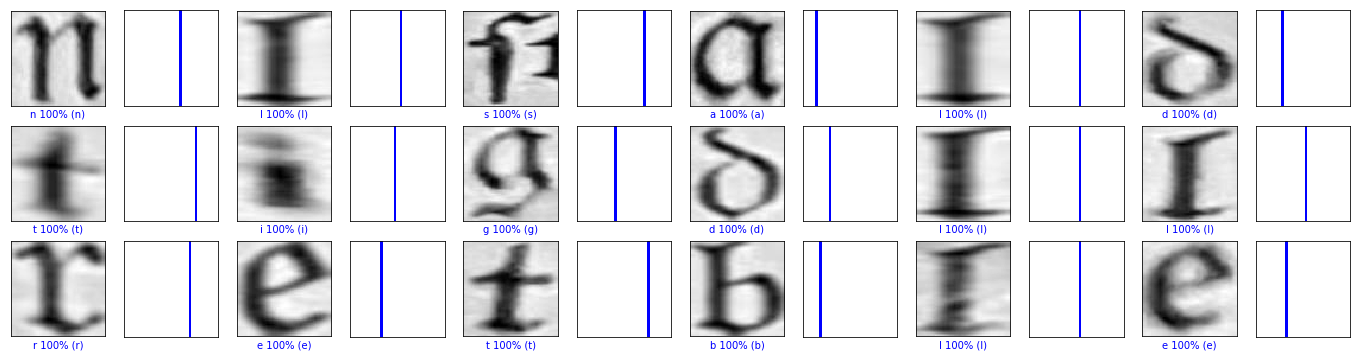

In [6]:
# Read the data 
filename = '{}images.idx3-ubyte'.format(dataset_test)
test_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_test)
test_labels = Idx.load_labels(filename)

test_data = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

predictions = model.predict(test_data)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

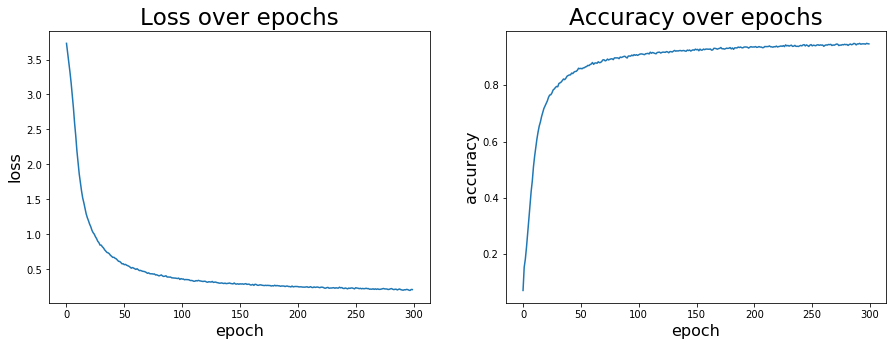

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

In [8]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model_conv.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model_conv.h5")
print("Model saved")

Model saved


In [11]:
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']
len(class_names)

44

### 